## Load the dataset

In [25]:
!pip install tensorflow

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=False)
class_count = len(faces.target_names)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 128, 128)


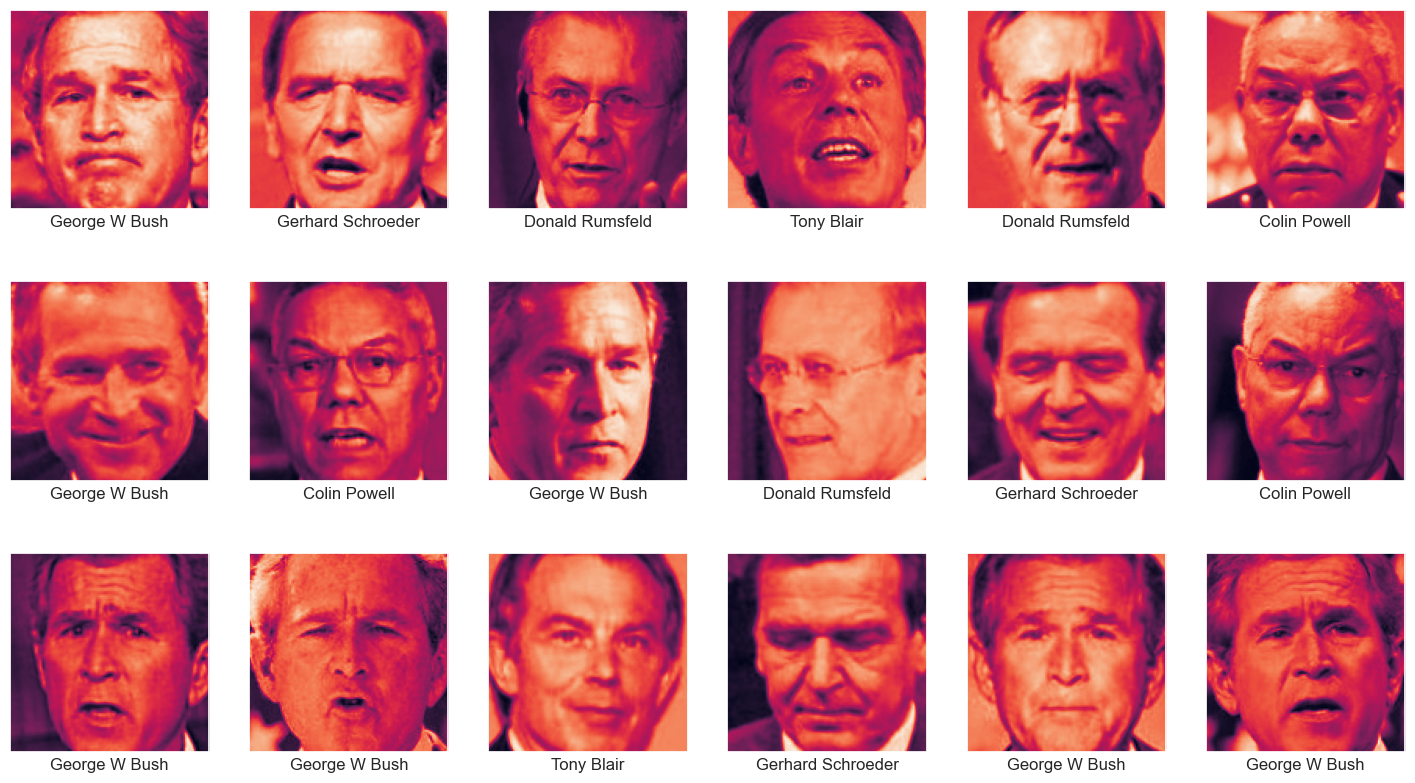

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(3, 6, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i]) # Scale pixel values so Matplotlib doesn't clip everything above 1.0
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

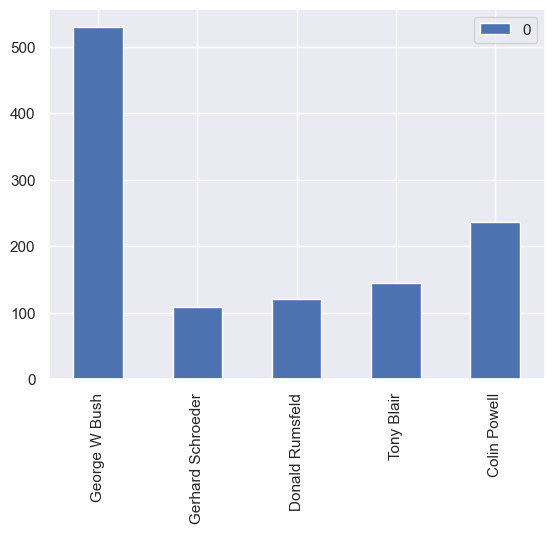

In [28]:
from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [30]:
mask = np.zeros(faces.target.shape, dtype=np.bool_)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2], 1))
x_faces.shape

(500, 128, 128, 1)

2
3
1
4
0


<Axes: >

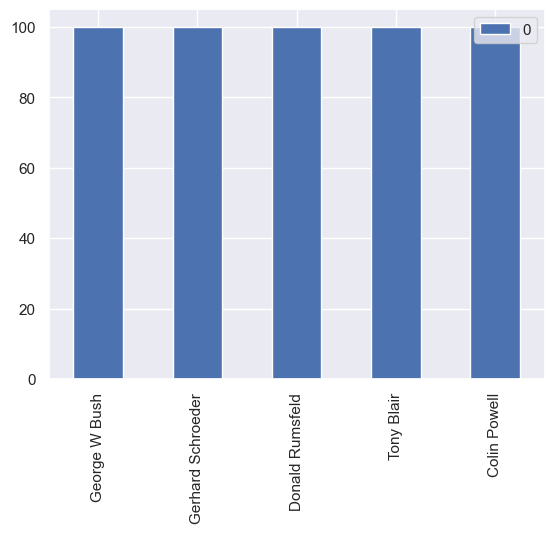

In [31]:
from collections import Counter
counts = Counter(y_faces)
names = {}

for key in counts.keys():
    print(key)
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [96]:
# !python -m pip install tensorflow

In [32]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

face_images = x_faces # Normalize pixel values
face_labels = to_categorical(y_faces)

x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, test_size=0.15, stratify=face_labels, random_state=42)

0.0

## CNN

In [33]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(face_images.shape[1:])))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Den\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,149 (6.34 MB)

 Trainable params: 1,662,149 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=25)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1959 - loss: 1.6734 - val_accuracy: 0.2000 - val_loss: 1.6091
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2258 - loss: 1.6084 - val_accuracy: 0.2400 - val_loss: 1.6058
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3492 - loss: 1.5957 - val_accuracy: 0.2267 - val_loss: 1.5788
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3151 - loss: 1.5236 - val_accuracy: 0.4800 - val_loss: 1.3041
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5085 - loss: 1.1678 - val_accuracy: 0.6667 - val_loss: 0.8965
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7349 - loss: 0.7148 - val_accuracy: 0.7600 - val_loss: 0.7918
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8117 - loss: 0.4970 - val_accuracy: 0.7200 - val_loss: 0.7991
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8663 - loss: 0.3707 - val_accuracy: 0.7867 - v

[]

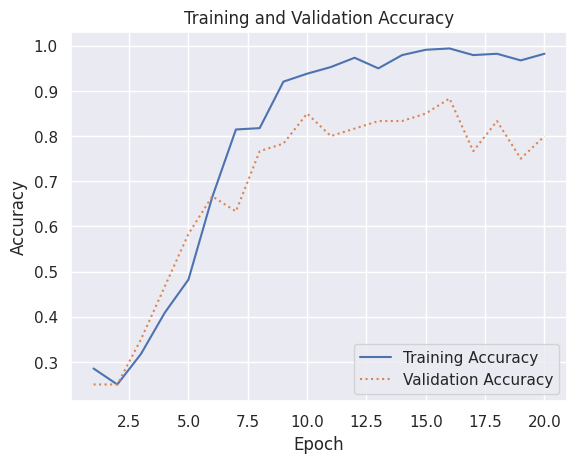

In [183]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

2/2 [==============================] - 0s 59ms/step


Text(109.44999999999996, 0.5, 'Actual label')

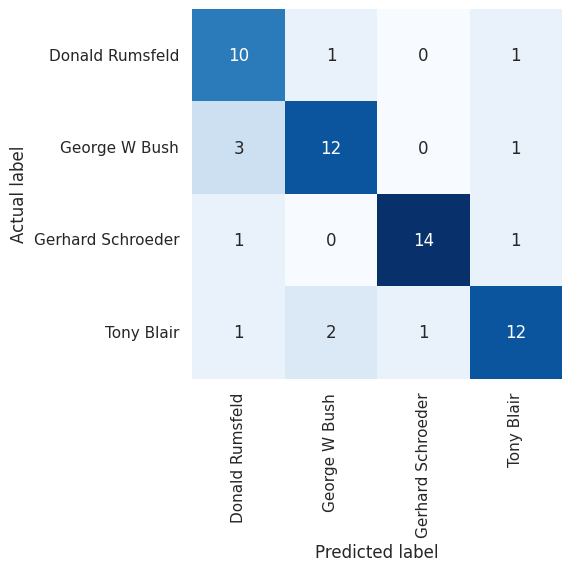

In [184]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## Pretrain VGG16

In [35]:
# Загружаем датасет Labeled Faces in the Wild (LFW) с использованием функции fetch_lfw_people из библиотеки scikit-learn.
# Указываем параметры для фильтрации данных:
# min_faces_per_person=100 - выбираем только тех людей, у которых в датасете есть 100 и более изображений,
# что помогает улучшить качество распознавания за счет более крупных и сбалансированных наборов данных по каждому классу.
# resize=1.0 - сохраняем оригинальный размер изображений, не применяя масштабирование.
# slice_=(slice(60, 188), slice(60, 188)) - обрезаем изображения до указанной области,
# что может помочь сосредоточить внимание модели на более релевантных частях лица, например, исключая фон.
# color=True - загружаем изображения в цвете, что может предоставить дополнительную информацию для распознавания по сравнению с градациями серого.
faces = fetch_lfw_people(min_faces_per_person=100, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=True)

# Вычисляем количество уникальных классов (лиц) в датасете, используя атрибут target_names объекта датасета.
# Это значение будет использоваться для определения количества выходных нейронов в модели классификации и для
# интерпретации результатов распознавания.
class_count = len(faces.target_names)

In [225]:
mask = np.zeros(faces.target.shape, dtype=np.bool_)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2], faces.images.shape[3]))
x_faces.shape

(400, 128, 128, 3)

In [226]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

face_images = x_faces # Normalize pixel values
face_labels = to_categorical(y_faces)

x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, test_size=0.15, stratify=face_labels, random_state=42)

In [227]:
# Импортируем функцию to_categorical из TensorFlow, которая используется для преобразования целочисленных меток в one-hot кодированные метки.
from tensorflow.keras.utils import to_categorical
# Импортируем функцию train_test_split из sklearn, предназначенную для разделения данных на обучающий и тестовый наборы.
from sklearn.model_selection import train_test_split

# Создаем переменную face_images, которая ссылается на данные изображений лиц. В комментарии упомянуто о нормализации
# значений пикселей, однако сам процесс нормализации здесь не производится. Нормализация обычно включает деление
# значений пикселей на 255 для преобразования их в диапазон от 0 до 1, что улучшает процесс обучения нейронной сети.
face_images = x_faces # Эта строка сама по себе не производит нормализацию пикселей.

# Преобразуем метки классов y_faces в формат one-hot, используя функцию to_categorical.
# Это преобразование необходимо, так как многие алгоритмы машинного обучения, включая нейронные сети,
# лучше работают с данными, представленными в виде векторов one-hot.
face_labels = to_categorical(y_faces)

# Разделяем набор данных на обучающую и тестовую выборки, используя функцию train_test_split.
# test_size=0.15 указывает, что 15% данных будут использованы как тестовый набор.
# Параметр stratify гарантирует, что в обучающей и тестовой выборках будет одинаковое распределение классов,
# что важно для поддержания сбалансированности данных.
# Параметр random_state=42 обеспечивает воспроизводимость разделения данных, позволяя получать одинаковое разделение при каждом выполнении кода.
x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, test_size=0.15, stratify=face_labels, random_state=42)


In [228]:
#vgg 16 model
classifier_vgg16 = VGG16(input_shape= (128, 128, 3),include_top=False,weights='imagenet')
classifier_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [229]:
#not train top layers
for layer in classifier_vgg16.layers:
    layer.trainable = False

In [230]:
#adding extra layers for our class/images
main_model = classifier_vgg16.output
main_model = GlobalAveragePooling2D()(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(512,activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(4,activation='softmax')(main_model)

In [231]:
#compiling
model = Model(inputs = classifier_vgg16.input , outputs = main_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=25)

Epoch 1/20
14/14 [==============================] - 17s 1s/step - loss: 1.4875 - accuracy: 0.3059 - val_loss: 1.2505 - val_accuracy: 0.3167
Epoch 2/20
14/14 [==============================] - 17s 1s/step - loss: 1.1625 - accuracy: 0.5294 - val_loss: 0.9482 - val_accuracy: 0.6333
Epoch 3/20
14/14 [==============================] - 18s 1s/step - loss: 0.9165 - accuracy: 0.6559 - val_loss: 0.6678 - val_accuracy: 0.7500
Epoch 4/20
14/14 [==============================] - 18s 1s/step - loss: 0.6273 - accuracy: 0.7941 - val_loss: 0.4573 - val_accuracy: 0.8333
Epoch 5/20
14/14 [==============================] - 18s 1s/step - loss: 0.3973 - accuracy: 0.8471 - val_loss: 0.5371 - val_accuracy: 0.8333
Epoch 6/20
14/14 [==============================] - 18s 1s/step - loss: 0.3856 - accuracy: 0.8647 - val_loss: 0.2670 - val_accuracy: 0.8833
Epoch 7/20
14/14 [==============================] - 18s 1s/step - loss: 0.2410 - accuracy: 0.9235 - val_loss: 0.3033 - val_accuracy: 0.9000
Epoch 8/20
14/14 [==

[]

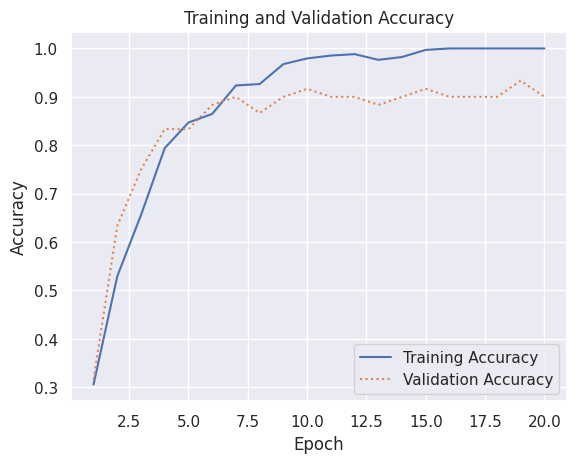

In [233]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

2/2 [==============================] - 3s 1s/step


Text(109.44999999999996, 0.5, 'Actual label')

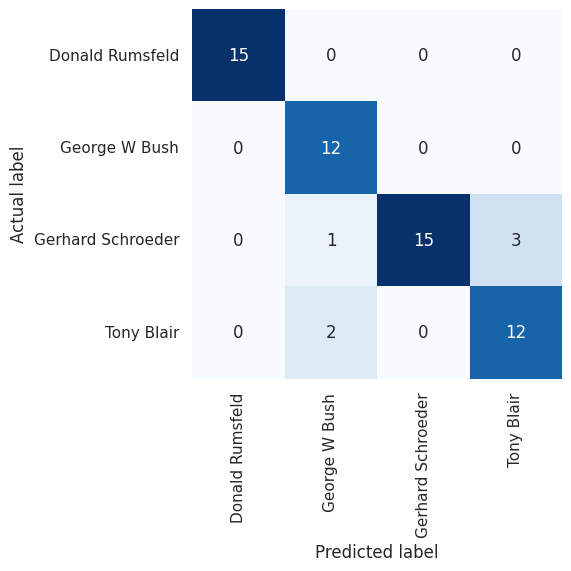

In [234]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## ResNet50 and ImageNet weights

In [248]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, resize=1.0, slice_=(slice(60, 188), slice(60, 188)), color=True)
class_count = len(faces.target_names)

print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Tony Blair']
(904, 128, 128, 3)


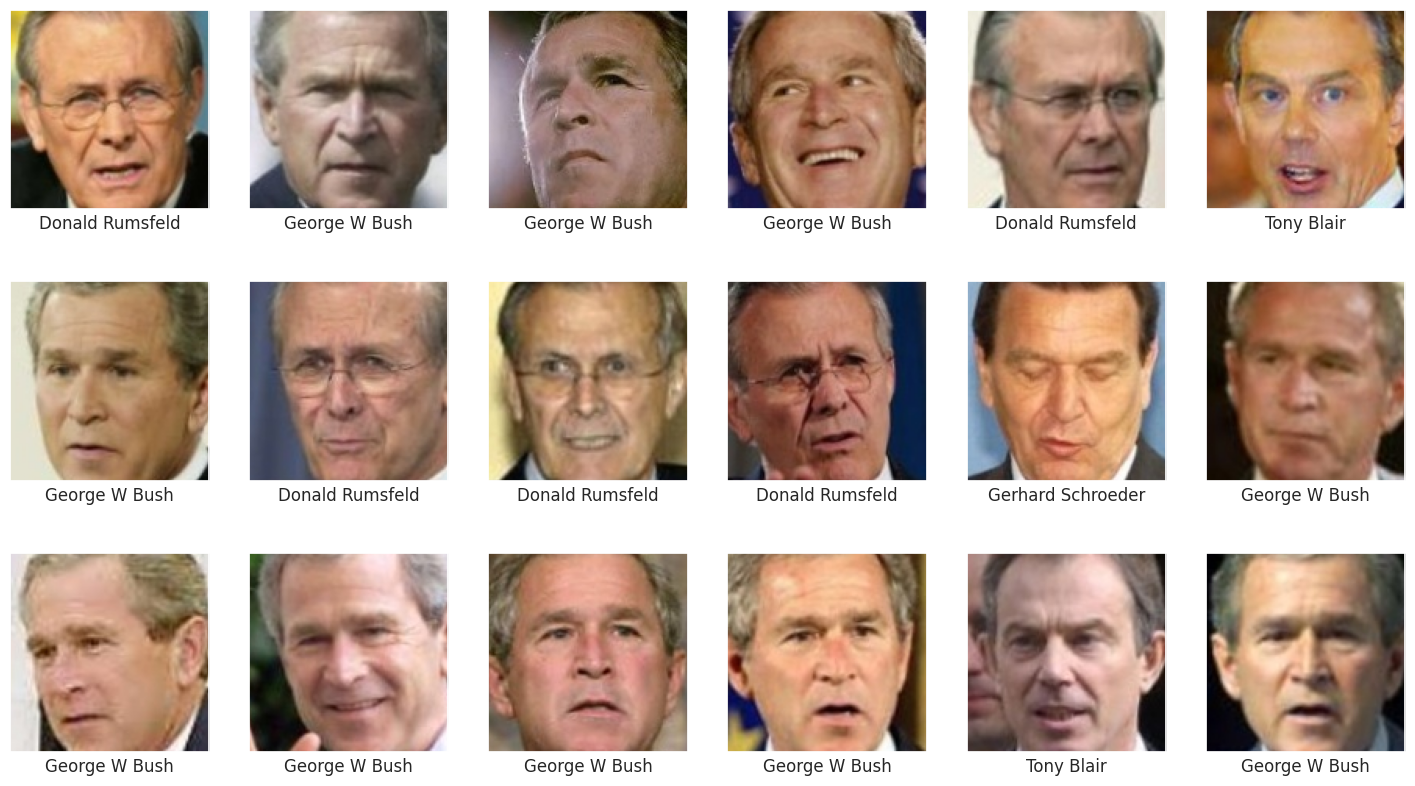

In [249]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(3, 6, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i]) # Scale pixel values so Matplotlib doesn't clip everything above 1.0
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [250]:
mask = np.zeros(faces.target.shape, dtype=np.bool_)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1

x_faces = faces.data[mask]
y_faces = faces.target[mask]
x_faces = np.reshape(x_faces, (x_faces.shape[0], faces.images.shape[1], faces.images.shape[2], faces.images.shape[3]))
x_faces.shape

(400, 128, 128, 3)

In [251]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split

face_images = preprocess_input(np.array(x_faces))
face_labels = to_categorical(y_faces)

x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=face_labels, random_state=0)


In [252]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

In [253]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Resizing

model = Sequential()
model.add(Resizing(224, 224))
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [255]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=25, epochs=20)

Epoch 1/20
13/13 [==============================] - 49s 3s/step - loss: 19.5898 - accuracy: 0.2500 - val_loss: 6.3933 - val_accuracy: 0.2500
Epoch 2/20
13/13 [==============================] - 39s 3s/step - loss: 3.8277 - accuracy: 0.2344 - val_loss: 2.1785 - val_accuracy: 0.2500
Epoch 3/20
13/13 [==============================] - 41s 3s/step - loss: 2.4938 - accuracy: 0.2969 - val_loss: 2.4819 - val_accuracy: 0.2500
Epoch 4/20
13/13 [==============================] - 39s 3s/step - loss: 1.5236 - accuracy: 0.3812 - val_loss: 1.1922 - val_accuracy: 0.5750
Epoch 5/20
13/13 [==============================] - 39s 3s/step - loss: 1.5046 - accuracy: 0.3625 - val_loss: 1.6275 - val_accuracy: 0.3750
Epoch 6/20
13/13 [==============================] - 39s 3s/step - loss: 1.6863 - accuracy: 0.3063 - val_loss: 1.8197 - val_accuracy: 0.3250
Epoch 7/20
13/13 [==============================] - 39s 3s/step - loss: 1.3117 - accuracy: 0.4437 - val_loss: 1.3506 - val_accuracy: 0.6375
Epoch 8/20
13/13 [=

[]

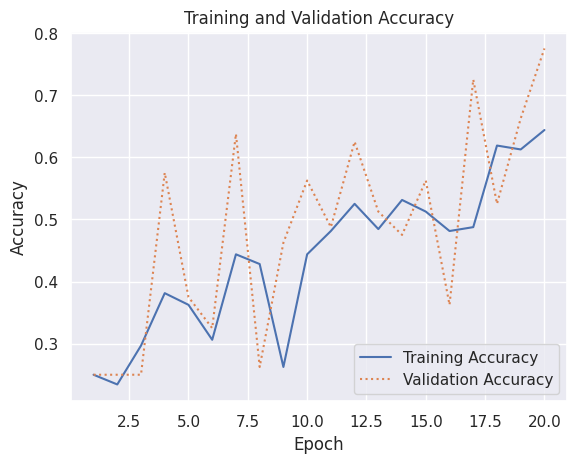

In [256]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()